In [ ]:
!pip install tensorflow==1.15.2

In [ ]:
import numpy as np
import tensorflow as tf
tf.enable_eager_execution()

In [ ]:
words = ['hello', 'world', 'agree', 'happy', 'apple', 'money', 'zebra',
         'chair', 'phone', 'board', 'class', 'light', 'boost', 'human']

char_set = list(set(''.join(words)))
char_dic = {c: i for i, c in enumerate(char_set)}
input_size = len(char_set)

In [ ]:
print(char_dic)

{'m': 0, 'z': 1, 'y': 2, 't': 3, 'c': 4, 'r': 5, 'l': 6, 'd': 7, 'h': 8, 'u': 9, 'p': 10, 'e': 11, 'o': 12, 's': 13, 'a': 14, 'b': 15, 'g': 16, 'i': 17, 'n': 18, 'w': 19}


In [ ]:
samples_idx = [[char_dic[c] for c in sample] for sample in words]
x_data = [samples_idx[i][:-1] for i in range(len(samples_idx))]
x_one_hot = np.array([[np.eye(input_size)[x] for x in x_tmp] for x_tmp in x_data], dtype='float32')
y_data = [samples_idx[i][-1] for i in range(len(samples_idx))]
y_one_hot = np.array([[np.eye(input_size)[y] for y in [y_tmp]] for y_tmp in y_data], dtype='float32')

In [ ]:
initializer = tf.contrib.layers.xavier_initializer()

In [ ]:
Wxh = tf.Variable(initializer([input_size, 1]), dtype='float32')
Wxh

<tf.Variable 'Variable:0' shape=(20, 1) dtype=float32, numpy=
array([[-0.10169005],
       [ 0.0400148 ],
       [-0.2708892 ],
       [ 0.05006129],
       [ 0.19571716],
       [ 0.30284965],
       [ 0.19962025],
       [ 0.01362103],
       [ 0.30340773],
       [-0.35748196],
       [ 0.3845929 ],
       [ 0.17022401],
       [-0.44862682],
       [-0.08770734],
       [ 0.24536055],
       [ 0.18495727],
       [ 0.09642208],
       [ 0.0904032 ],
       [-0.07752246],
       [ 0.5177085 ]], dtype=float32)>

In [ ]:
b = tf.Variable(initializer([1]), dtype='float32')
b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.9980502], dtype=float32)>

In [ ]:
Whh = tf.Variable([initializer([1])], dtype='float32')
Whh

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-1.2983315]], dtype=float32)>

In [ ]:
w0 = tf.Variable([initializer([input_size])], dtype='float32')
b0 = tf.Variable([initializer([input_size])], dtype='float32')

In [ ]:
optimizer = tf.train.AdamOptimizer(0.001)

loss = []

for i in range(10000):
    if i % 1000 == 0: print(i)
    total_cost = 0
    with tf.GradientTape() as tape:
        for idx, X in enumerate(x_one_hot):
            # print(X)
            h0 = tf.tanh(tf.matmul(X[0:1], Wxh) + b)

            h1 = tf.matmul(X[1:2], Wxh) + b
            h1 += tf.matmul(h0, Whh)
            h1 = tf.tanh(h1)

            h2 = tf.matmul(X[2:3], Wxh) + b
            h2 += tf.matmul(h1, Whh)
            h2 = tf.tanh(h2)

            h3 = tf.matmul(X[3:4], Wxh) + b
            h3 += tf.matmul(h2, Whh)
            h3 = tf.tanh(h3)

            hypothesis = tf.nn.softmax(tf.matmul(h3, w0) + b0)
            cost = -tf.reduce_sum(y_one_hot[idx] * tf.log(hypothesis))/len(hypothesis)
            total_cost += cost

        grads = tape.gradient(total_cost, [Wxh, b, Whh, w0, b0])
        optimizer.apply_gradients(grads_and_vars=zip(grads, [Wxh, b, Whh, w0, b0]))
        loss.append(total_cost.numpy())
    if i % 1000 == 0:
        print('cost: ', total_cost.numpy())
        print('='*20)

0
cost:  41.305283
1000
cost:  23.814762
2000
cost:  21.078922
3000
cost:  20.369925
4000
cost:  20.077803
5000
cost:  18.77701
6000
cost:  18.27994
7000
cost:  17.924849
8000
cost:  17.657127
9000
cost:  17.337288


In [ ]:
for i, X in enumerate(x_one_hot):
    # print(X)
    h0 = tf.tanh(tf.matmul(X[0:1], Wxh) + b)

    h1 = tf.matmul(X[1:2], Wxh) + b
    h1 += tf.matmul(h0, Whh)
    h1 = tf.tanh(h1)

    h2 = tf.matmul(X[2:3], Wxh) + b
    h2 += tf.matmul(h1, Whh)
    h2 = tf.tanh(h2)

    h3 = tf.matmul(X[3:4], Wxh) + b
    h3 += tf.matmul(h2, Whh)
    h3 = tf.tanh(h3)

    hypothesis = tf.nn.softmax(tf.matmul(h3, w0) + b0)

    data = ''.join(char_set[int(i)] for i in np.argmax(X, axis=1))
    target = pred = char_set[np.argmax(y_one_hot[i])]
    pred = char_set[np.argmax(hypothesis)]

    print(f'input: {data}   target: {target},   prediction: {pred}')

input: hell   target: o,   prediction: d
input: worl   target: d,   prediction: d
input: agre   target: e,   prediction: e
input: happ   target: y,   prediction: d
input: appl   target: e,   prediction: e
input: mone   target: y,   prediction: y
input: zebr   target: a,   prediction: a
input: chai   target: r,   prediction: t
input: phon   target: e,   prediction: e
input: boar   target: d,   prediction: d
input: clas   target: s,   prediction: t
input: ligh   target: t,   prediction: t
input: boos   target: t,   prediction: t
input: huma   target: n,   prediction: d


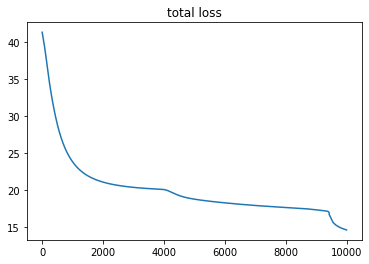

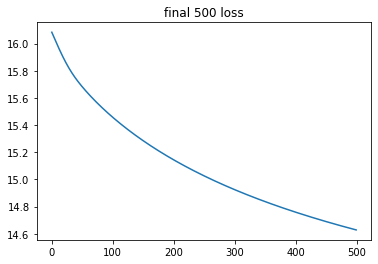

In [ ]:
import matplotlib.pyplot as plt

plt.title('total loss')
plt.plot(loss)
plt.show()

plt.title('final 500 loss')
plt.plot(loss[-500:])
plt.show()